197
198
201
203
204
205
206
207
208
209
210
211
212
213
214
215
217
218
219
220
221
222
223
224
225


IndexError: index 24 is out of bounds for axis 0 with size 24

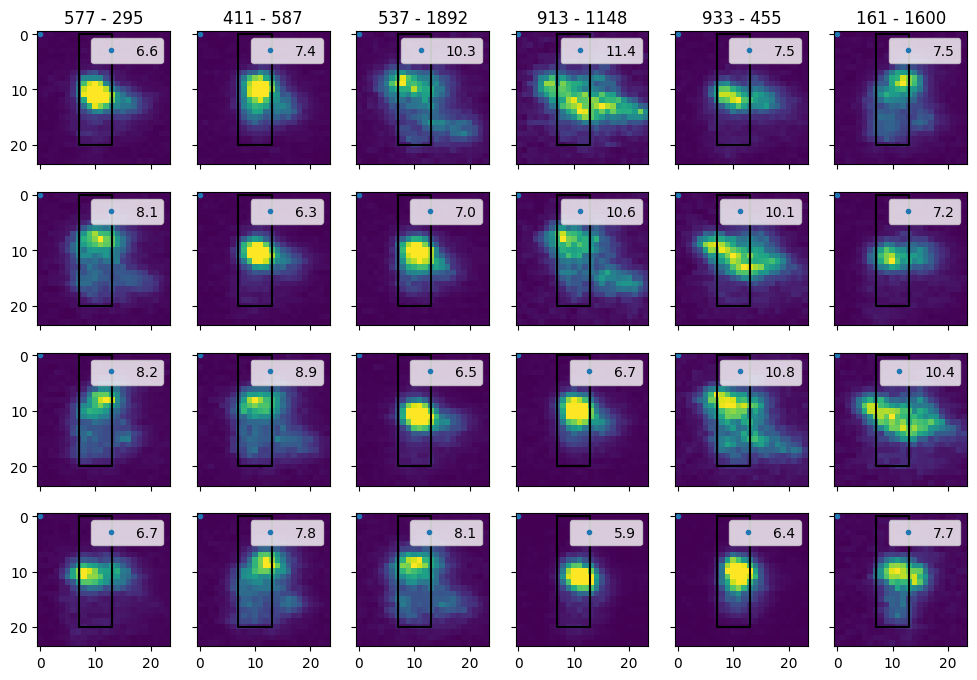

In [2]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from labellines import labelLines
import glob
from astropy.io import fits
import warnings
warnings.filterwarnings("ignore")
from pyds9plugin.DS9Utils import analyze_spot
from matplotlib.colors import LogNorm


a = Table.read("/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/XY0_F4_2023-06-14 - CNES moves-2.csv")

a["Sigma"] = 0.0
a["Flux"] = 0.0
a["EE50"] = 0.0
a["EE80"] = 0.0
a["cx"] = 0.0
a["cy"] = 0.0
fig, axes = plt.subplots (4,6,sharex=True,sharey=True,figsize=(12,8))
r=12
for i, line in enumerate(a[:]):
    try:
        print(int(line["Det # (open mask)"]))
    except MaskError:
        sys.exit()
    else:
        
        image = fits.open("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/DOBC_data/230615/xy/image%06d.fits"%(int(line["Det # (open mask)"])))[0].data
        axes.flatten()[i].imshow(image[int(line["Centroid_y"])-r:int(line["Centroid_y"])+r,int(line["Centroid_x"])-r:int(line["Centroid_x"])+r])#,interpolation=False)
        # axes.flatten()[i].imshow(image[int(line["Centroid_y"])-r:int(line["Centroid_y"])+r,int(line["Centroid_x"])-r:int(line["Centroid_x"])+r],norm=LogNorm())
        d = analyze_spot(
        image,
        center=[float(line["Centroid_x"]),float(line["Centroid_y"])],
        fibersize=0,
        center_type="max",
        SigmaMax=50,
        )
        a["Sigma"][i] = d["Sigma"]
        a["Flux"][i] = d["Flux"]
        a["EE50"][i] = d["EE50"]
        a["EE80"][i] = d["EE80"]
        a["cx"][i] = d["Center"][0]
        a["cy"][i] = d["Center"][0]
        axes.flatten()[i].plot([7,13,13,7,7],[0,0,20,20,0],"-k")
        if i<6:
            axes.flatten()[i].set_title("%i - %i"%(float(line["Centroid_x"]),float(line["Centroid_y"])))
        axes.flatten()[i].plot(0,0,".",label=np.round(2.35*a["Sigma"][i]*1.1,1))
        axes.flatten()[i].legend()
        # axes.flatten()[i].plot([8,12,12,8,8],[0,0,20,20,0],"--k")
fig.tight_layout()
a["Sigma","Flux","EE50","EE80","cx","cy"].to_pandas().to_clipboard()

Text(0, 0.5, '-CE frames')

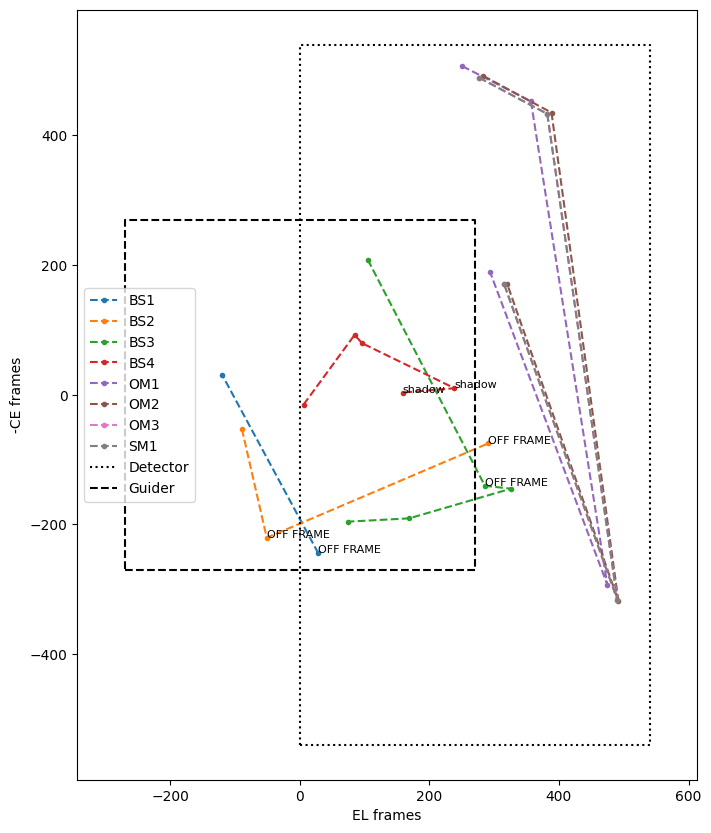

In [5]:
path = "/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/XY0_F4_2023-06-14 - CNES moves-6.csv"
path = "/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/XY1_F3_2023-06-20 - small CNES moves-3.csv"
path="/Users/Vincent/Library/CloudStorage/OneDrive-CaliforniaInstituteofTechnology/Safari/XY3_QSO_2023-06-21 - CNES moves-10.csv"

cat = Table.read(path)
cat= cat#[:4]
plt.figure(figsize=(8,10))
for path in np.unique(cat["path"]):
    mask = cat["path"]==path
    plt.plot(cat["EL_abs"][mask],-cat["CE_abs"][mask],"--.",label=path)
# plt.text(cat["EL_abs"],cat["CE_abs"],cat["Visible"])
# for l in cat:
#     try:
#         plt.text(l["EL_abs"],l["CE_abs"],l["Visible"],fontsize=6)
#     except TypeError:
#         pass
for l in cat:
    try:
        plt.text(l["EL_abs"],-l["CE_abs"],l["Visible"],fontsize=8)
    except TypeError:
        pass

n=1
plt.plot([0,n*540,n*540,0,0],[-n*540,-n*540,n*540,n*540,-n*540],"k:",label="Detector")
plt.plot([-n*540/2,n*540/2,n*540/2,-n*540/2,-n*540/2],[-n*540/2,-n*540/2,n*540/2,n*540/2,-n*540/2],"k--",label="Guider")
plt.legend()
plt.axis("equal")
plt.xlabel("EL frames")
plt.ylabel("-CE frames")
# plt.savefig(path.replace(".csv",".png"))


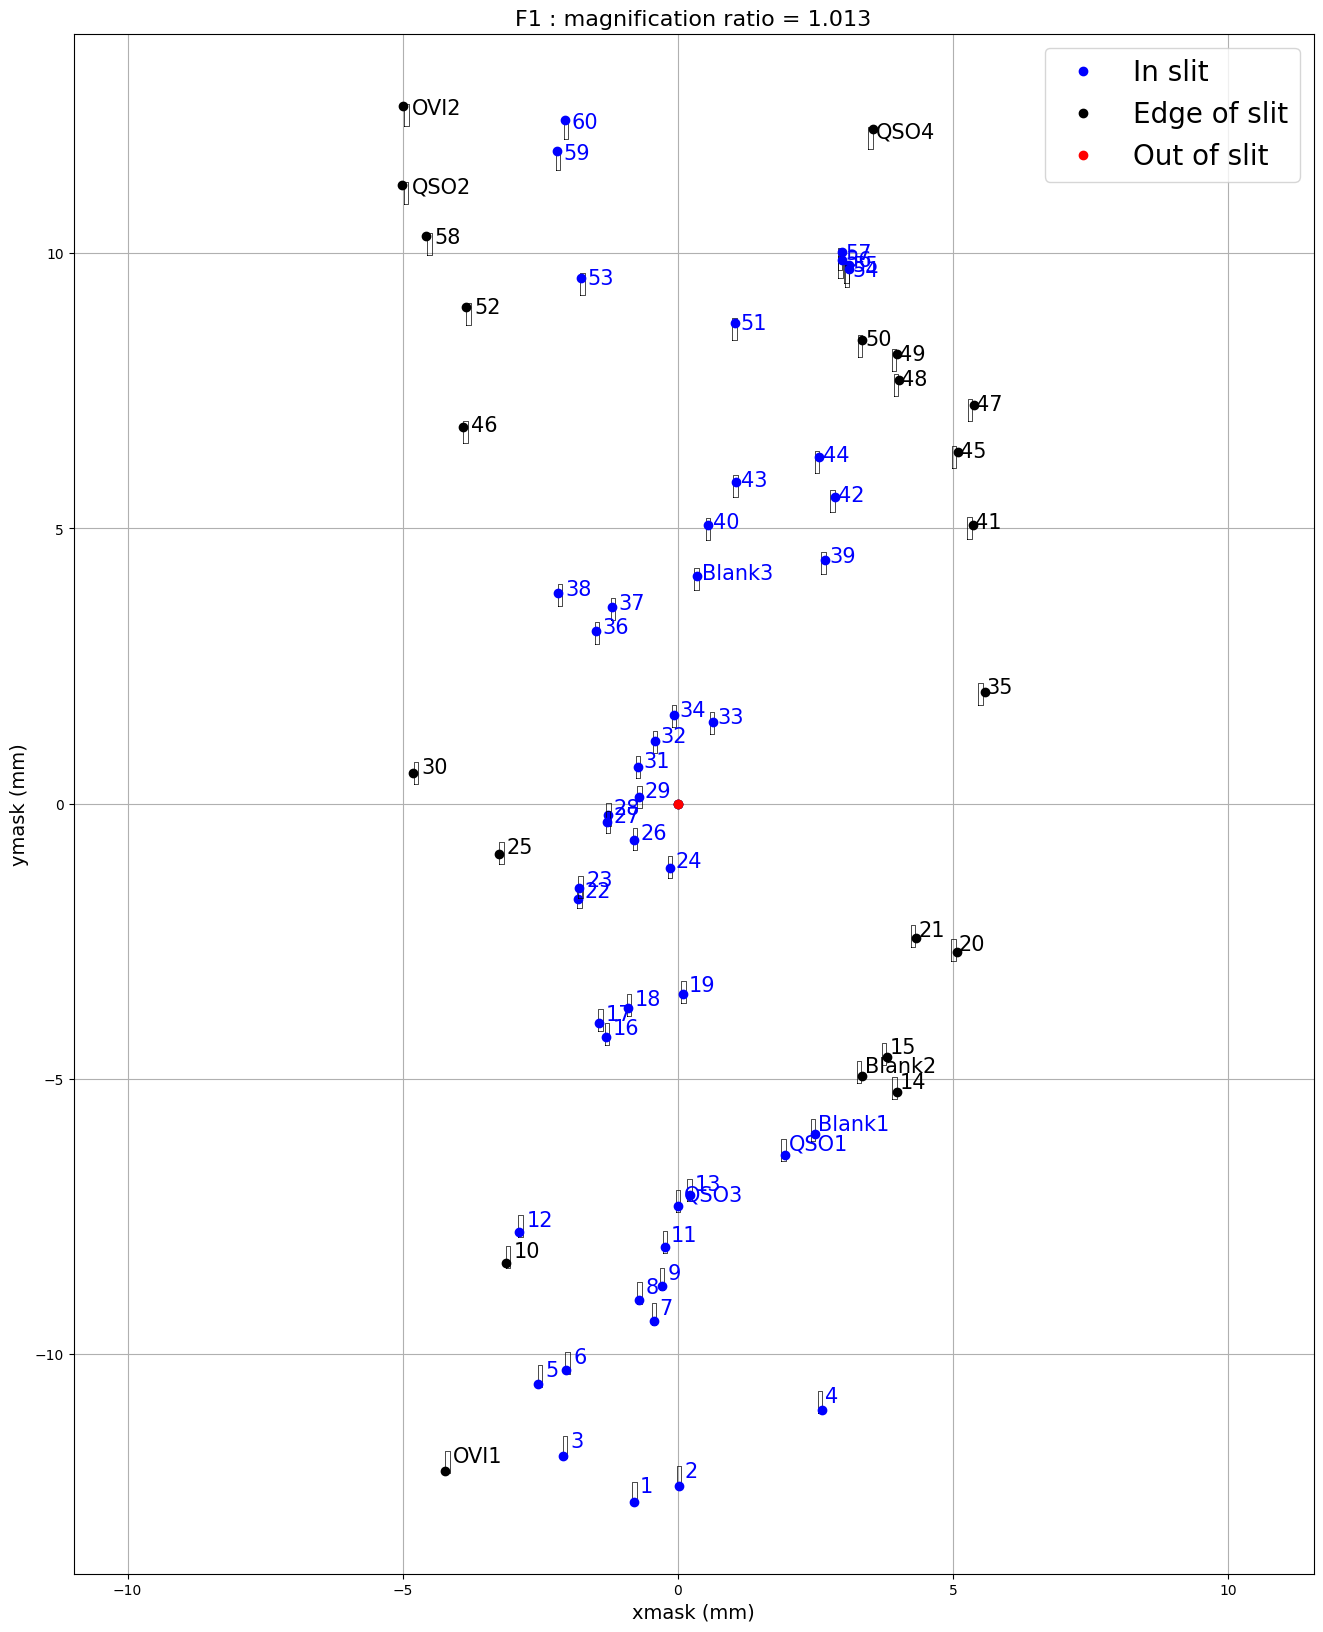

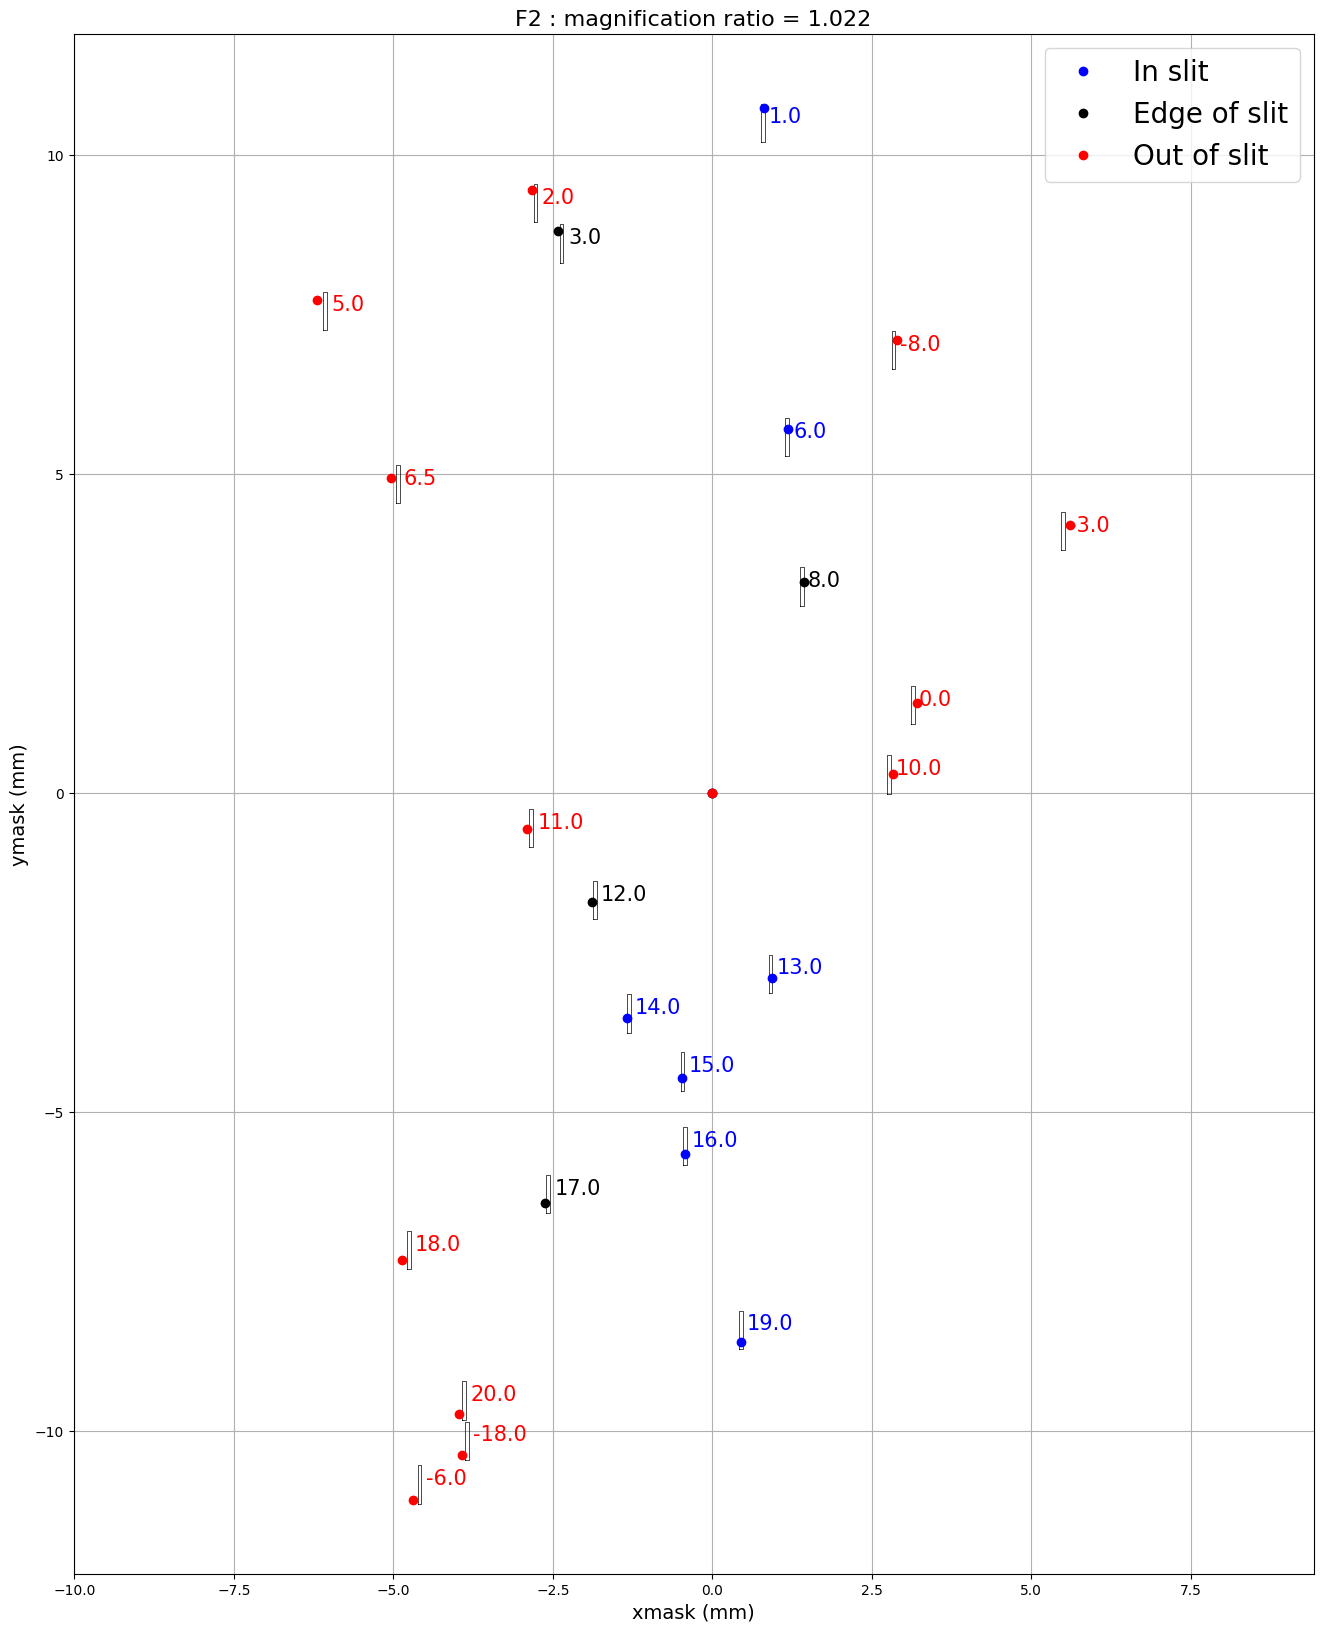

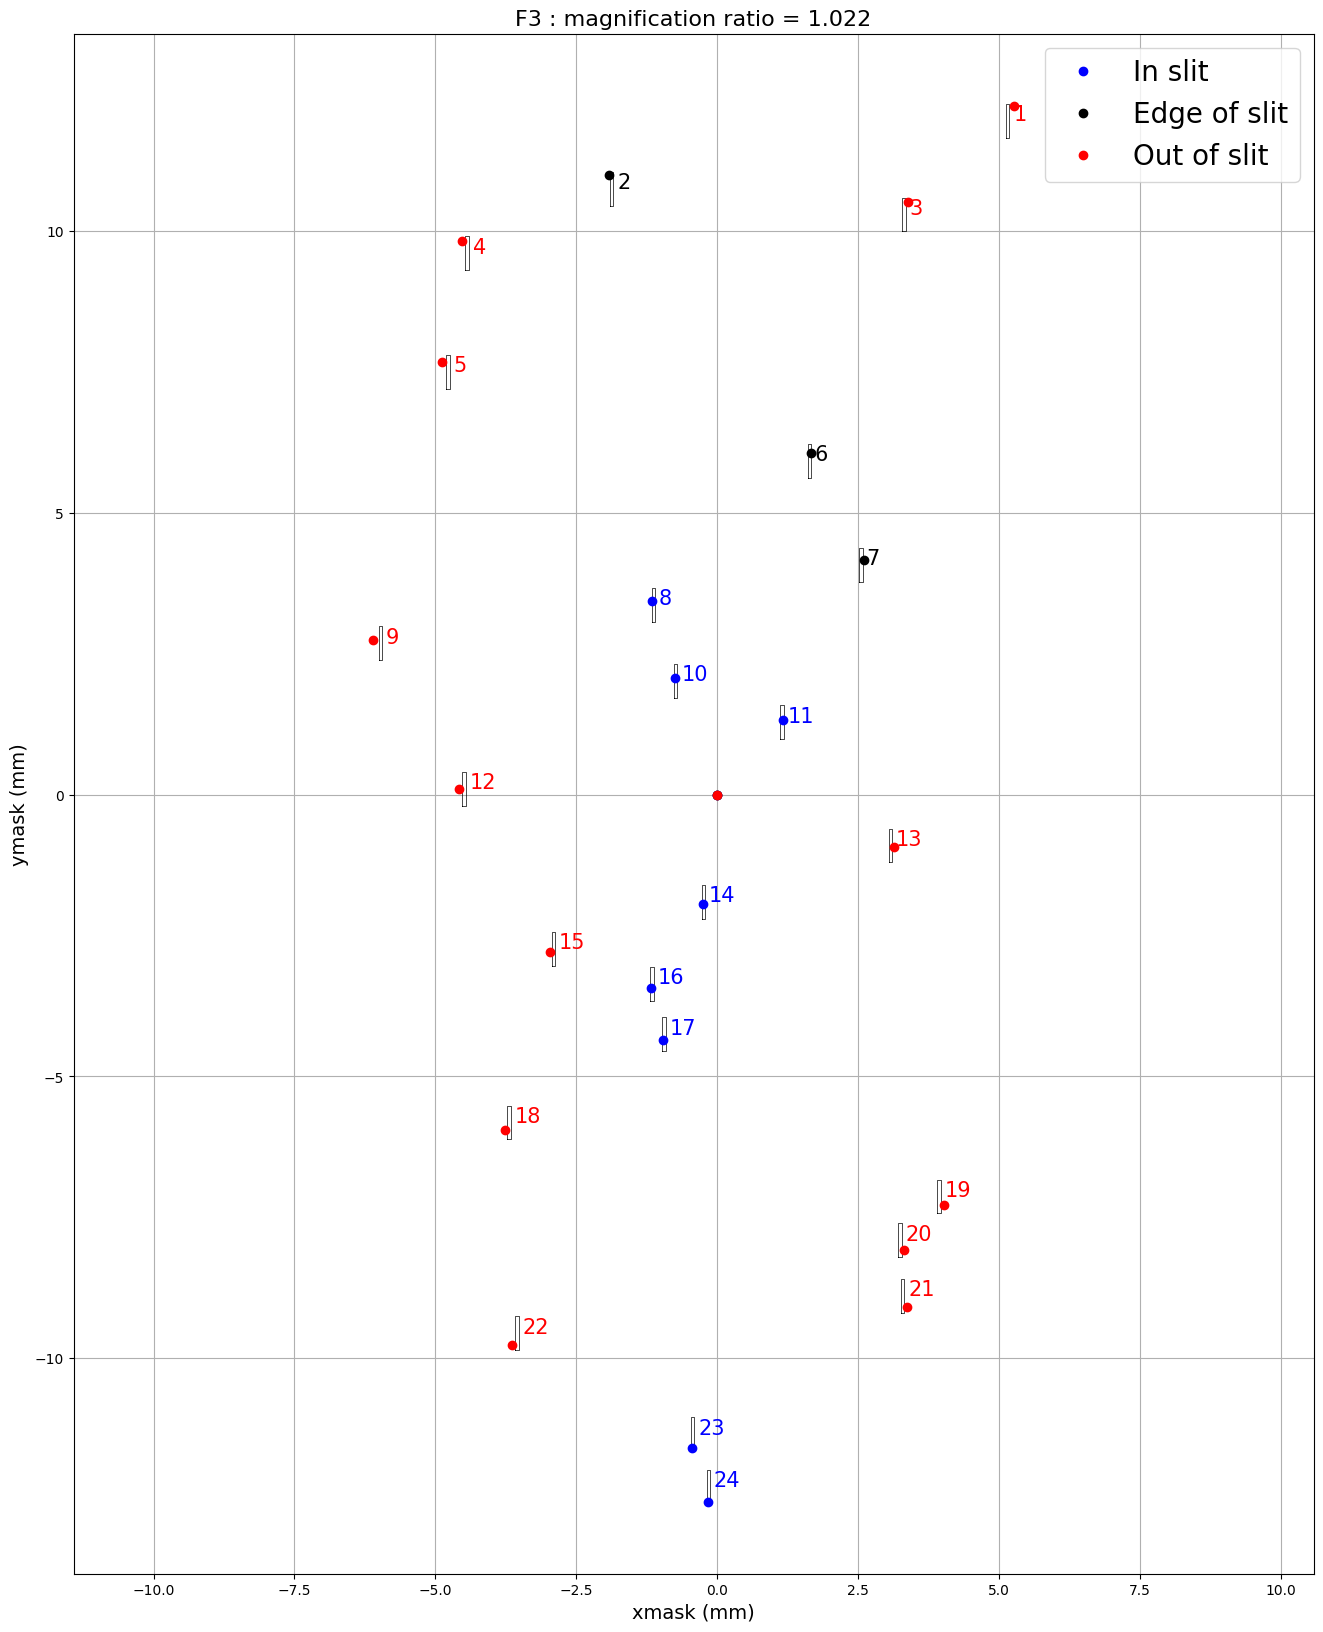

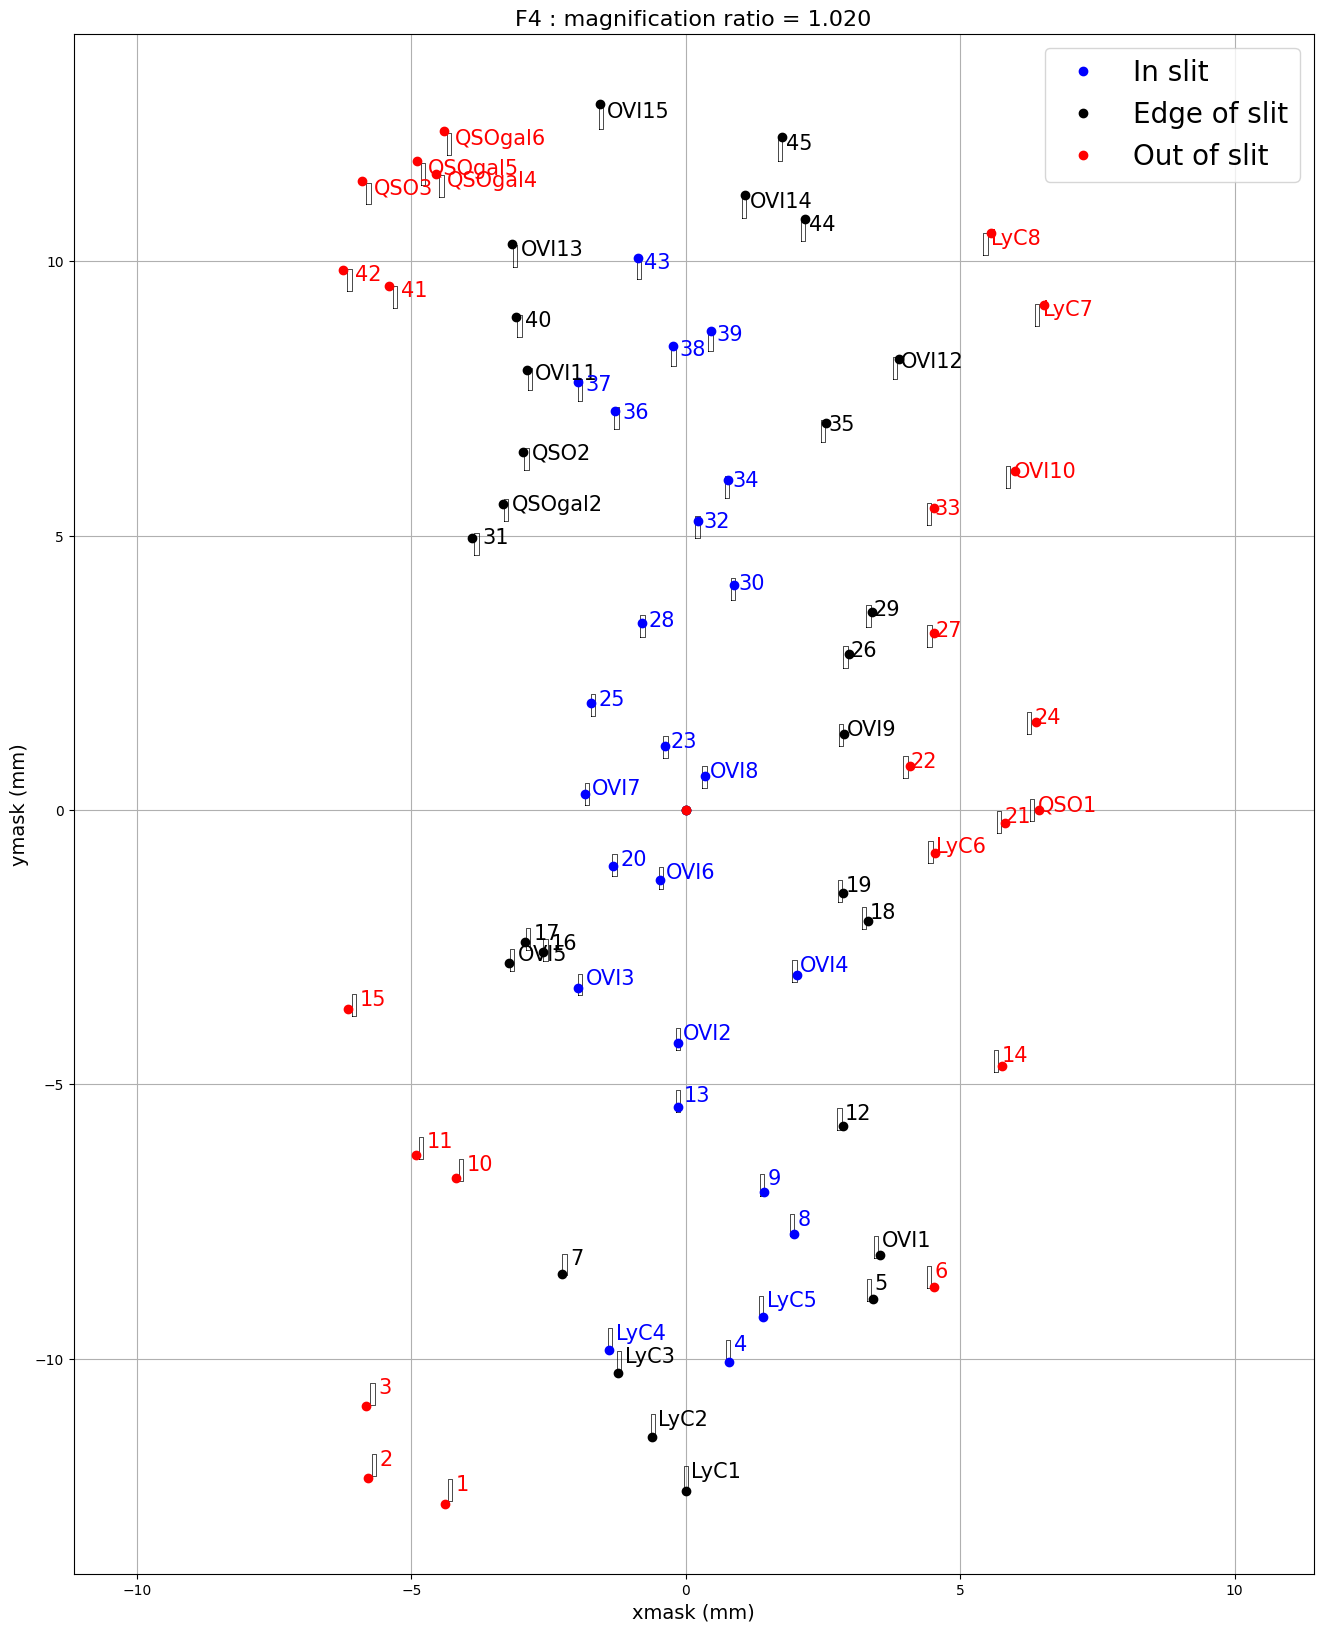

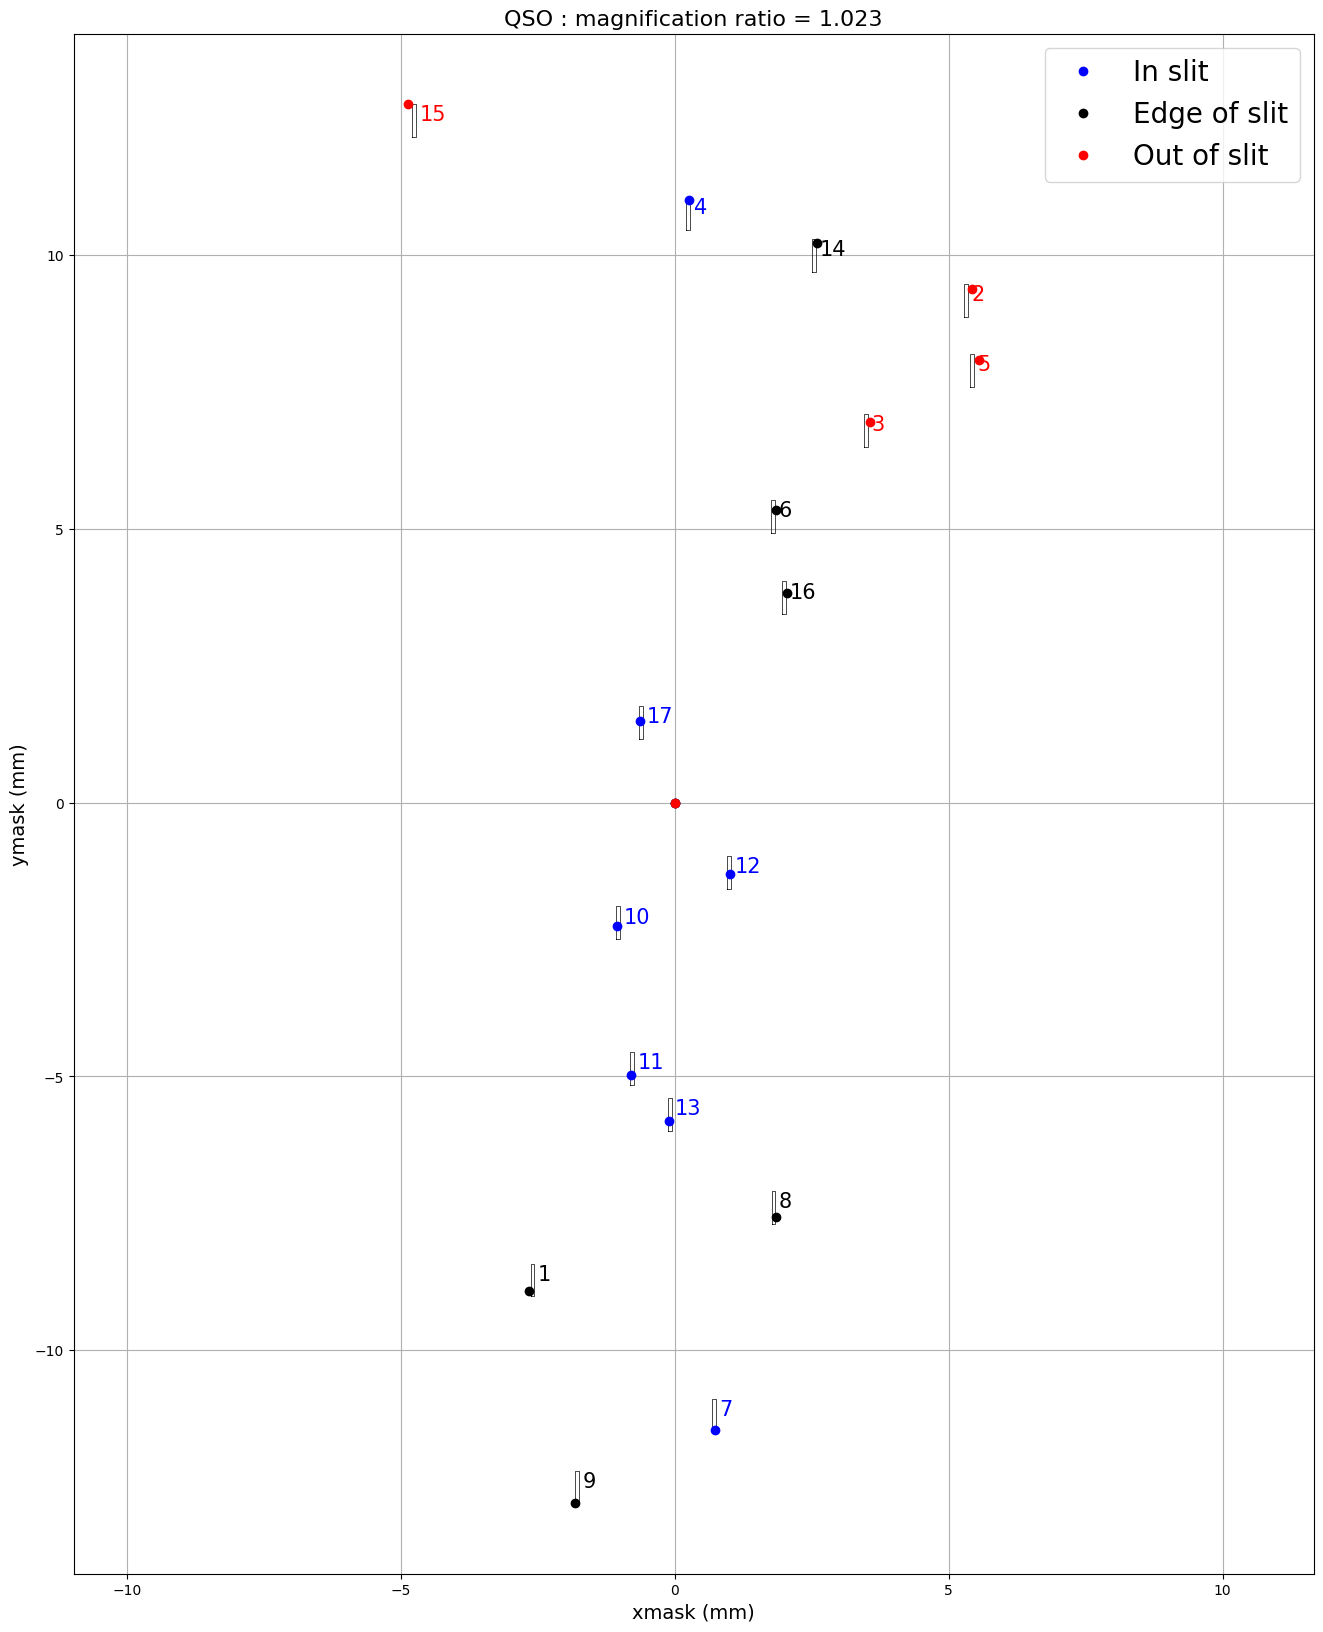

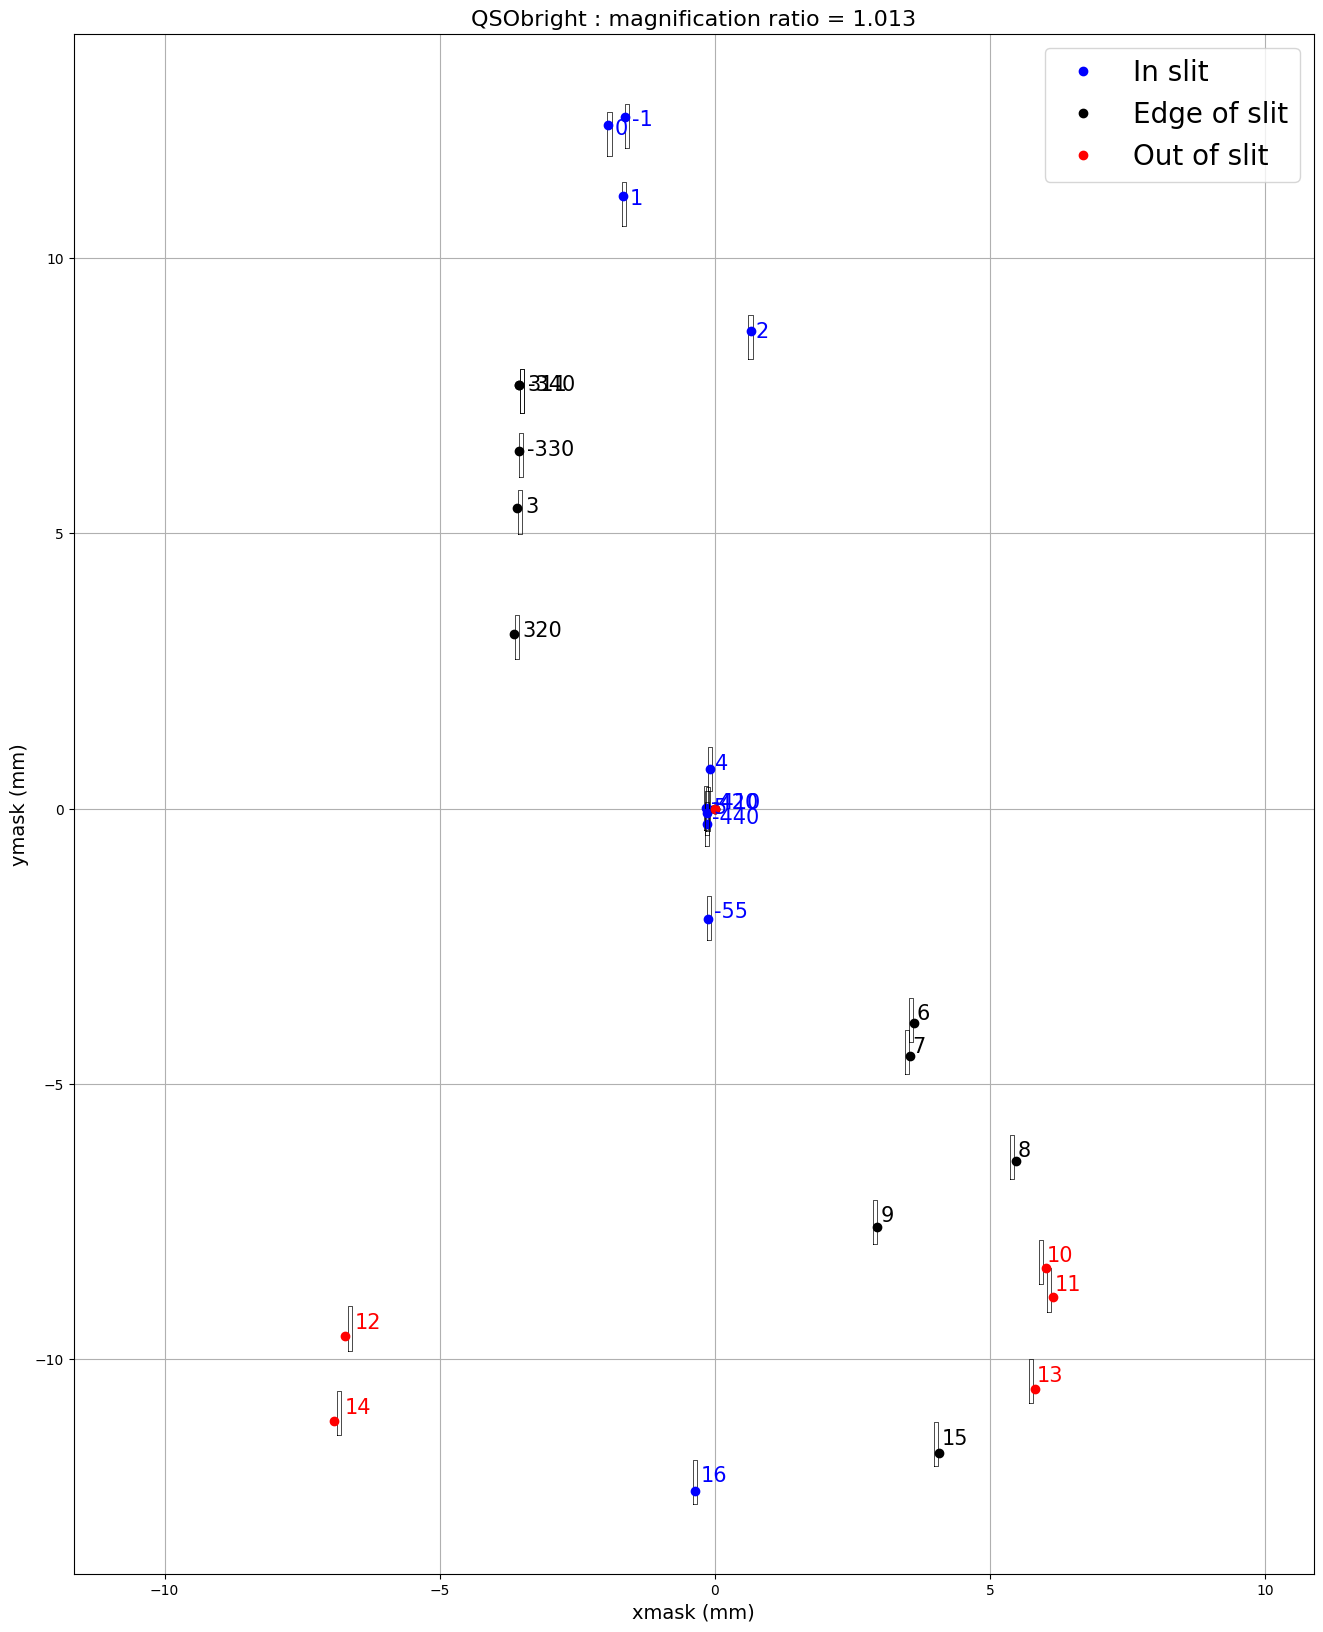

In [4]:

mags_caltech = {"F1":1.007,"F2":1.014,"F3":0.993,"F4":0.988,"QSO":0.989,"QSObright":0}
mags_FTS = {"F1":1.008,"F2":1.017,"F3":1.017,"F4":1.015,"QSO":1.018,"QSObright":1.0085}
widths = {"F1":0.2,"F2":0.3,"F3":0.3,"F4":0.2,"QSO":0.3,"QSObright":0.4}
lengths = {"F1":0.04,"F2":0.03,"F3":0.03,"F4":0.04,"QSO":0.035,"QSObright":0.037}

offset=0.005
for field in ["F1","F2","F3","F4","QSO","QSObright"]:
    cat = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/FireBallPipe/Calibration/Targets/2022/targets_%s.csv"%(field))
    percent = mags_FTS[field] + offset
    width = widths[field]#
    length= lengths[field]#
    # plt.figure(figsize=(16,10))
    plt.figure(figsize=(16,20))
    width, length =length , width
    # plt.plot([cat["y_mm"]-width,cat["y_mm"]+width,cat["y_mm"]+width,cat["y_mm"]-width,cat["y_mm"]-width],[cat["x_mm"]-length,cat["x_mm"]-length,cat["x_mm"]+length,cat["x_mm"]+length,cat["x_mm"]-length],c="k",lw=0.5)
    for l in cat:
        # plt.plot([cat["x_mm"]-width,cat["x_mm"]+width,cat["x_mm"]+width,cat["x_mm"]-width,cat["x_mm"]-width],[cat["y_mm"]-length,cat["y_mm"]-length,cat["y_mm"]+length,cat["y_mm"]+length,cat["y_mm"]-length],c="k",lw=0.5)
        plt.plot([l["y_mm"]-width,l["y_mm"]+width,l["y_mm"]+width,l["y_mm"]-width,l["y_mm"]-width],[l["x_mm"]-length,l["x_mm"]-length,l["x_mm"]+length,l["x_mm"]+length,l["x_mm"]-length],c="k",lw=0.5)
        d1 = abs(l["y_mm"]-percent*l["y_mm"])
        d2 = abs(l["x_mm"]-percent*l["x_mm"])
        if (d1>2*width) | (d2>2*length): 
            color="r"
        elif (d1>width) | (d2>length): 
            color="k"
        else:
            color="blue"
        plt.text(l["y_mm"]+0.1,l["x_mm"],l["Internal-count"],fontsize=15,color=color)
        plt.plot(percent*l["y_mm"],percent*l["x_mm"],"o",color=color)#,label="Galaxy positions on the mask")
    # plt.plot(percent*cat["x_mm"],percent*cat["y_mm"],".",label="Galaxy positions on the mask")
    # plt.plot(percent*cat["y_mm"],percent*cat["x_mm"],"o",label="Galaxy positions on the mask")
    plt.plot(0,0,"ob",label="In slit")
    plt.plot(0,0,"ok",label="Edge of slit")
    plt.plot(0,0,"or",label="Out of slit")
    plt.legend(fontsize=20)
    plt.axis("equal")
    plt.xlabel("xmask (mm)",fontsize=14)
    plt.ylabel("ymask (mm)",fontsize=14)
    plt.grid()
    plt.title(field + " : magnification ratio = %0.3f"%(percent),fontsize=16)
    plt.savefig("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/Science/Flight/Targets/position_in_slit/field_%s.png"%(field), bbox_inches="tight")
    plt.show()